In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

# defining bins 
bn = 31

#loading texts

jla_cov=np.loadtxt("C:/Users/Admin/Downloads/jla_mub_covmatrix.txt")
jla=np.loadtxt("C:/Users/Admin/Downloads/jla_mub_0.txt")
covariance=jla_cov.reshape(31,31)

# inverse finding 
cov_inverse=np.linalg.inv(covariance)

print(jla)  

#first column all values 
#redshift
z=jla[:,0]
# print(z)

#second column all values
nu_obs = jla[:,1]
# print (nu_obs)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


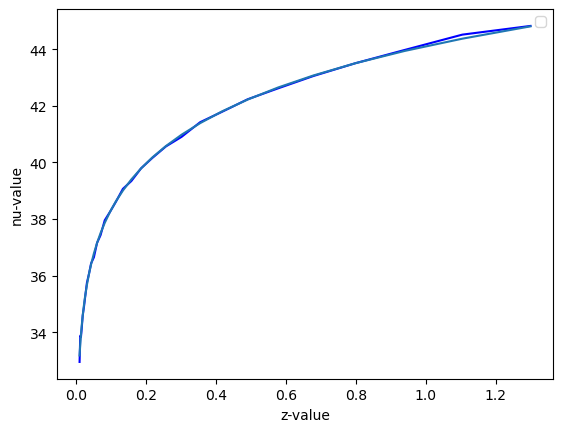

In [41]:
# defining all the functions for formulae given in assignment

def eta(a,w):
    s=((1.0-w)/w)**(1.0/3.0)
    n=2.0*(np.sqrt((s**3)+1))*((a**(-4.0))-(0.1540*s*(a**(-3.0)))+(0.4304*(s**2)*(a**(-2.0)))+(0.19097*(s**3)*(a**(-1.0)))+(0.066941*(s**4)))**(-1.0/8.0)
    return n

def D_L(z,w):
    eta1=eta(1,w)
    eta2=eta(1/(1+z),w)
    d=(3000.0*(1+z))*(eta1-eta2)
    return d

def nu(z,w,h):                     
    d=D_L(z,w)
    m=25-(5*np.log10(h))+(5*np.log10(d))
    return m

def likelihood(h,w): 
    L=0
    nu_theory=nu(z,h,w)
    for i in range(31):
        for j in range(31):
            L=L+((nu_obs[i]-nu_theory[i])*cov_inverse[i,j]*(nu_obs[j]-nu_theory[j]))
    return -0.5*L


def prior(h):
    m = 0.738
    s = 0.024

  
    return (1/(np.sqrt(2 * np.pi)* s)) * np.exp(-((h - m)/s)**2)




nu_1= nu(z,0.3,0.7) #expected guess

plt.xlabel("z-value")
plt.ylabel("nu-value")
plt.plot(z,nu_obs,color="blue")
plt.plot(z,nu_1)
plt.legend()

plt.show()


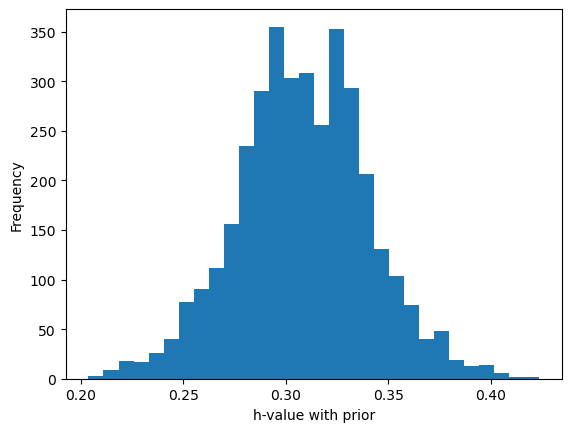

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


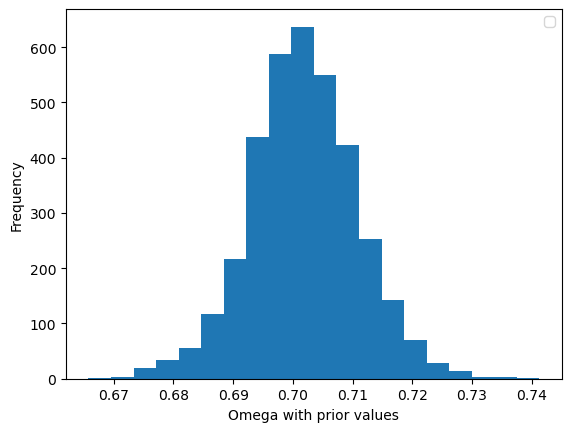

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


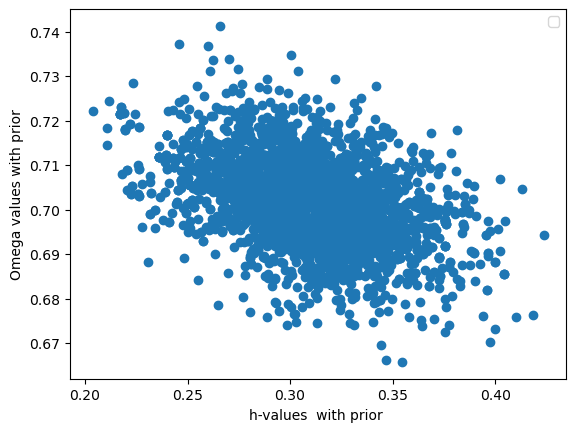

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


WITH PRIOR
acceptance_ratio =  0.48175
mean of h values =  0.3214626064349954
mean of omega values =  0.70032345410319
Variance of h values =  0.005404496971515211
Variance of omega values =  0.00014259160584382735
Covariance value =  [[ 0.00540585 -0.00062035]
 [-0.00062035  0.00014263]]


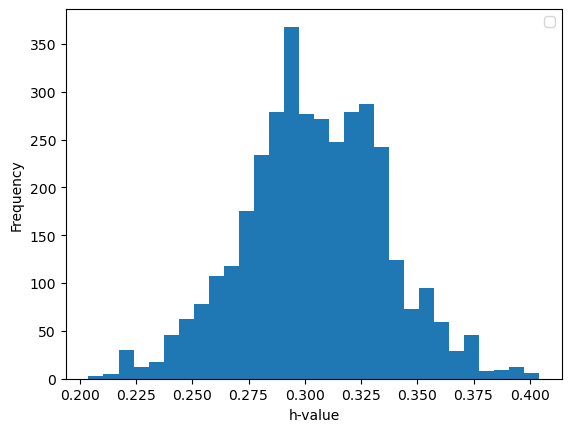

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


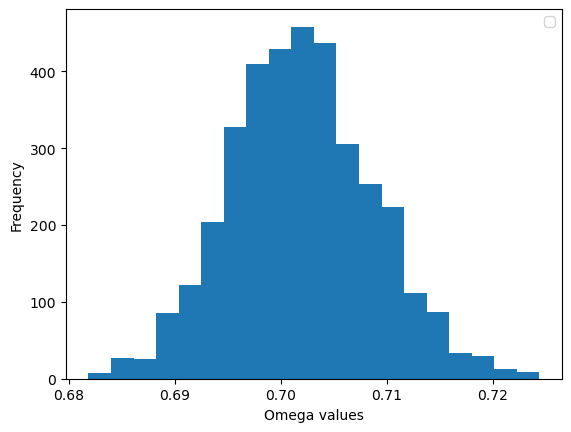

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


WITHOUT PRIOR
acceptance_ratio =  0.5055
mean of h values =  0.3174999372466141
mean of omega values =  0.7004675738974872
Variance of h values =  0.005382777150613589
Variance of omega values =  0.00010683761376182886
Covariance value =  [[ 0.00538412 -0.00061686]
 [-0.00061686  0.00010686]]
b =  400


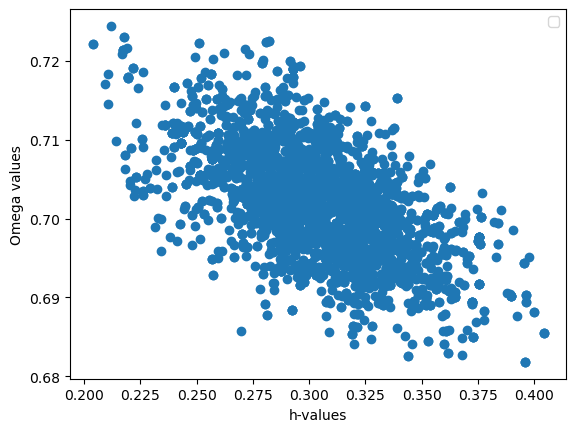

In [42]:
#mcmc algortihn

def mcmc(steps,sigma):
    h_val =np.zeros(steps)
    omga_val=np.zeros(steps)
    burn_in = int(0.1*steps)  #defining when to burn 
    h_val[0] = 0.8  #giving an initial value to start 
    omga_val[0] = 0.7 #giving an initial value to start 
    acceptance_p=0
    acceptance=0
     
#     with prior
    h_valp =np.zeros(steps)
    omga_valp=np.zeros(steps)
    acpt_p = 0
    h_valp[0] = 0.8  #giving an initial value to start 
    omga_valp[0] = 0.7 #giving an initial value to start 
    
    for i in range(1,steps):
        
        h_curr = h_val[i-1]  
        om_curr = omga_val[i-1]
        
        #the nect value will be dependent on previous value 
        h_proposed = np.random.normal(h_curr,sigma)
        omga_proposed = np.random.normal(om_curr,sigma)
    
#        withput prior 
        p1 = likelihood(h_curr,om_curr)
        if h_proposed<0 or h_proposed>1 or omga_proposed<0 or omga_proposed>1:
            p2 = -np.inf   
        else:
            p2 = likelihood(h_proposed,omga_proposed)
    
#         prior
        P= (np.exp(likelihood(h_proposed,omga_proposed)) * prior(h_proposed)) / (np.exp(likelihood(h_val[i-1],omga_val[i-1])) * prior(h_val[i-1])) # prior
       
    
        #acceptence probability 
        accep_prob_p  = min(P,1)  #with prior
        
        accep_prob  = min(1,np.exp(p2-p1))
        
        #first element of random array 
        alpha = np.random.rand(1)[0]
        
#         with prior
        
        if alpha<accep_prob_p:
            h_valp[i] = h_proposed
            omga_valp[i] = omga_proposed
            acceptance_p=acceptance_p+1
        else:
            h_valp[i] = h_curr
            omga_valp[i] = om_curr
   
        hp_burnt = h_valp[burn_in : ]
        omp_burnt = omga_valp[burn_in :]
        
#         without prior
        if alpha<accep_prob:
            h_val[i] = h_proposed
            omga_val[i] = omga_proposed
            acceptance = acceptance+1
        else:
            h_val[i] = h_curr
            omga_val[i] = om_curr

        hwp_burnt = h_val[burn_in : ]
        omwp_burnt = omga_val[burn_in :]            

# without prior 
    plt.xlabel("h-value with prior")
    plt.ylabel("Frequency")   
    plt.hist(h_valp[burn_in:],bins=30)
#     plt.savefig("f.pdf",bbox_inches='tight')
    plt.show()
    plt.legend()
    
    plt.xlabel("Omega with prior values")
    plt.ylabel("Frequency")
    plt.hist(omga_valp[burn_in:],bins = 20)
#     plt.savefig("f1.pdf",bbox_inches='tight')
    plt.show()
    plt.legend()
    
    plt.ylabel("Omega values with prior")
    plt.xlabel("h-values  with prior ")
    
    plt.scatter(h_valp[burn_in:],omga_valp[burn_in:])
    plt.show()
    plt.legend()
    
    #     plt.savefig("f3.pdf",bbox_inches='tight')
    acceptance_ratio=acceptance_p/steps
    print("WITH PRIOR")
    print("acceptance_ratio = ",acceptance_ratio)
    
    # average 
    print("mean of h values = ",np.mean(h_valp))
    print("mean of omega values = ",np.mean(omga_valp))
    
    #Variance 
    print("Variance of h values = ",np.var(h_valp))
    print("Variance of omega values = ",np.var(omga_valp))
    
    #Covariance 
    print("Covariance value = ",np.cov(h_valp,omga_valp))
    
    
#    without prior
    plt.xlabel("h-value")
    plt.ylabel("Frequency")   
    plt.hist(h_val[burn_in:],bins=30)
#     plt.savefig("f.pdf",bbox_inches='tight')
    plt.show()
    plt.legend()
    
    plt.xlabel("Omega values")
    plt.ylabel("Frequency")
    plt.hist(omga_val[burn_in:],bins = 20)
#     plt.savefig("f1.pdf",bbox_inches='tight')
    plt.show()
    plt.legend()
    
    plt.ylabel("Omega values")
    plt.xlabel("h-values")
    
    plt.scatter(h_val[burn_in:],omga_val[burn_in:])
    plt.savefig("f3.pdf",bbox_inches='tight')
    acceptance_ratio=acceptance/steps
    print("WITHOUT PRIOR")
    print("acceptance_ratio = ",acceptance_ratio)
    
    # average 
    print("mean of h values = ",np.mean(h_val))
    print("mean of omega values = ",np.mean(omga_val))
    
    #Variance 
    print("Variance of h values = ",np.var(h_val))
    print("Variance of omega values = ",np.var(omga_val))
    
    #Covariance 
    print("Covariance value = ",np.cov(h_val,omga_val))
    print("b = ",burn_in)
    return h_valp , h_val , hp_burnt ,hwp_burnt, omga_valp , omga_val  , omp_burnt , omwp_burnt  , acceptance_p , acceptance ,  burn_in # mu_accepted 
    
F  =  mcmc(4000,0.01)


In [ ]:
print(burn_in)

In [43]:
#mcmc algortihn

def mcmc1(steps,sigma):
    h_val =np.zeros(steps)
    omga_val=np.zeros(steps)
    burn_in = int(0.1*steps)  #defining when to burn 
    h_val[0] = 0.8  #giving an initial value to start 
    omga_val[0] = 0.7 #giving an initial value to start 
    acceptance_p=0
    acceptance=0
     
#     with prior
    h_valp =np.zeros(steps)
    omga_valp=np.zeros(steps)
    acpt_p = 0
    h_valp[0] = 0.8  #giving an initial value to start 
    omga_valp[0] = 0.7 #giving an initial value to start 
    
    for i in range(1,steps):
        
        h_curr = h_val[i-1]  
        om_curr = omga_val[i-1]
        
        #the nect value will be dependent on previous value 
        h_proposed = np.random.normal(h_curr,sigma)
        omga_proposed = np.random.normal(om_curr,sigma)
    
#        withput prior 
        p1 = likelihood(h_curr,om_curr)
        if h_proposed<0 or h_proposed>1 or omga_proposed<0 or omga_proposed>1:
            p2 = -np.inf   
        else:
            p2 = likelihood(h_proposed,omga_proposed)
    
#         prior
        P= (np.exp(likelihood(h_proposed,omga_proposed)) * prior(h_proposed)) / (np.exp(likelihood(h_val[i-1],omga_val[i-1])) * prior(h_val[i-1])) # prior
       
    
        #acceptence probability 
        accep_prob_p  = min(P,1)  #with prior
        
        accep_prob  = min(1,np.exp(p2-p1))
        
        #first element of random array 
        alpha = np.random.rand(1)[0]
        
#         with prior
        
        if alpha<accep_prob_p:
            h_valp[i] = h_proposed
            omga_valp[i] = omga_proposed
            acceptance_p=acceptance_p+1
        else:
            h_valp[i] = h_curr
            omga_valp[i] = om_curr
   
        hp_burnt = h_valp[burn_in : ]
        omp_burnt = omga_valp[burn_in :]
        
#         without prior
        if alpha<accep_prob:
            h_val[i] = h_proposed
            omga_val[i] = omga_proposed
            acceptance = acceptance+1
        else:
            h_val[i] = h_curr
            omga_val[i] = om_curr

        hwp_burnt = h_val[burn_in : ]
        omwp_burnt = omga_val[burn_in :]            

    return h_valp , h_val , omga_valp , omga_val  # mu_accepted 
    

In [44]:
def GR_test(l):

    J = 4
    
    # mean
    m_hp =[]  # mean of h with prior
    m_h = [] # mean of h without prior
    
    # variance
    var_hp =[] 
    var_h = []
    m_omgap = []
    m_omga = []
    var_omgap = []
    burn_omga = []
    for d in range(1,10):
        a,b,c,d = mcmc1(l,0.1)
        a_mean = np.mean(a) # chain mean with prior
        b_mean = np.mean(b) # chain mean without prior
        a_sd = (np.std(a))
        b_sd = (np.std(b))
        c_mean = np.mean(c) # chain mean with prior
        d_mean = np.mean(d) # chain mean without prior
        c_sd = (np.std(c))
        d_sd = (np.std(d))
        m_hp.append(a_mean) # prior
        m_h.append(b_mean) # without prior
        var_hp.append(a_sd**2) # prior
        var_h.append(b_sd**2) # without prior
        m_omgap.append(c_mean) # prior
        m_omga.append(d_mean) # without prior
        var_omgap.append(c_sd**2) # prior
        burn_omga.append(d_sd**2) # without prior


    # total mean with prior
    m_hp_tmean = np.mean(m_hp)  
    m_h_tmean = np.mean(m_h) # grand mean without  prior

    m_omgap_tmean = np.mean(m_omgap)  # grand mean with prior
    m_omga_tmean = np.mean(m_omga) # grand mean without  prior

    sig_chain_hp = np.mean(var_hp)  # avg. of individual chain variances
    sig_chain_h = np.mean(var_h)

    sig_chain_omgap = np.mean(var_omgap)  # avg. of individual chain variances
    sig_chain_omga = np.mean(burn_omga)




    W_hp = np.sum((m_hp - m_hp_tmean)**2) / J
    W_h = np.sum((m_h - m_h_tmean)**2) / J

    W_omgap = np.sum((m_omgap - m_omgap_tmean)**2) / J
    W_omga = np.sum((m_omga - m_omga_tmean)**2) / J


    R_ph = (((J - 1)/J) * sig_chain_hp + (1/J) * W_hp)/ sig_chain_hp    # Gelman-Rubin statistic

    R_wph =  (((J - 1)/J) * sig_chain_h + (1/J) * W_h)/ sig_chain_h # Gelman-Rubin statistic


    R_po = (((J - 1)/J) * sig_chain_omgap + (1/J) * W_omgap)/ sig_chain_omgap    # Gelman-Rubin statistic

    R_wpo =  (((J - 1)/J) * sig_chain_omga + (1/J) * W_omga)/ sig_chain_omga # Gelman-Rubin statistic

    return R_ph , R_wph , R_po , R_wpo



In [45]:
L = np.array ([10,20,70,90,150,199, 250, 300, 350, 390])
rp = []
rwp = []
rpo = []
rwpo = []
for k in range(len(L)):
    a , b , c, d = GR_test(L[k])
    rp.append(a)
    rwp.append(b)
    rpo.append(c)
    rwpo.append(d)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6628\1602120733.py:36: RuntimeWarning: overflow encountered in exp
  P= (np.exp(likelihood(h_proposed,omga_proposed)) * prior(h_proposed)) / (np.exp(likelihood(h_val[i-1],omga_val[i-1])) * prior(h_val[i-1])) # prior
C:\Users\Admin\AppData\Local\Temp\ipykernel_6628\1602120733.py:36: RuntimeWarning: invalid value encountered in cdouble_scalars
  P= (np.exp(likelihood(h_proposed,omga_proposed)) * prior(h_proposed)) / (np.exp(likelihood(h_val[i-1],omga_val[i-1])) * prior(h_val[i-1])) # prior
C:\Users\Admin\AppData\Local\Temp\ipykernel_6628\1602120733.py:49: RuntimeWarning: invalid value encountered in less
  if alpha<accep_prob_p:


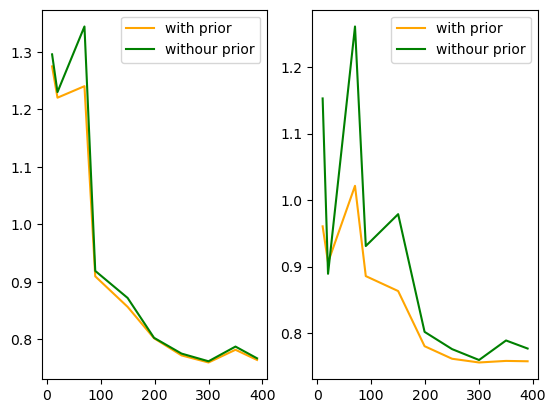

In [46]:
plt.title("Gelman-Rubin convergence test", fontsize = 5)
plt.xlabel("length of chain", fontsize = 5)
plt.ylabel("R value")
plt.subplot(1,2,1)
plt.plot(L,rp, color = "orange" , label = "with prior")
plt.plot(L,rwp , color = "green" , label = "withour prior")
plt.legend()
plt.subplot(1,2,2)
plt.plot(L,rpo, color = "orange" , label = "with prior")
plt.plot(L,rwpo , color = "green" , label = "withour prior")
plt.legend()
plt.show()
